In [1]:
%load_ext autoreload
%autoreload 2

from Shared.shared import *
from Shared.specific_CNB_sim import *

sim_name = f"Dopri5_1k_z0p15"
sim_folder = f"sim_output/{sim_name}"
fig_folder = f"figures_local/{sim_name}"
Cl_folder = f"Shared/Cls"
nu_m_range = jnp.load(f"{sim_folder}/neutrino_massrange_eV.npy")
nu_m_picks = jnp.array([
    0.01, 
    # 0.05, 
    0.1, 
    # 0.2, 0.3
])*Params.eV
simdata = SimData(sim_folder)

#! Broken halos: either snapshot info missing or anomalous number densities
exclude_nums = jnp.array([
    22,  # halo23
])


# Fermi-Dirac distribution assumption
# note: total densities are computed for length 50 mass range
pix_dens_FD = jnp.load(f"{sim_folder}/pixel_densities.npy")
tot_dens_FD = jnp.load(f"{sim_folder}/total_densities.npy")

# pix_dens_FD = jnp.delete(pix_dens_FD, exclude_nums, axis=0)
# tot_dens_FD = jnp.delete(tot_dens_FD, exclude_nums, axis=0)
print(pix_dens_FD.shape)
print(tot_dens_FD.shape)

# Incl. primordial fluctuations, for all halos with 1 seed
# note: all sky densities are computed for 5 specific masses
pix_dens_PF_halos = jnp.load(f"{sim_folder}/pixel_densities_incl_PFs.npy")
tot_dens_PF_halos = jnp.load(f"{sim_folder}/total_densities_incl_PFs.npy")

print(pix_dens_PF_halos.shape)
print(tot_dens_PF_halos.shape)

# Incl. primordial fluctuations, for all halos with 1 seed
# note: all sky densities are computed for 5 specific masses
exclude_halo_nums = [20]
halo_nums = [x for x in range(1, 11) if x not in exclude_halo_nums]
pix_dens_PF_seeds = jnp.array(
    [jnp.load(f"{sim_folder}/pixel_densities_incl_PFs_seeds_halo{halo_j}.npy")
     for halo_j in halo_nums])
tot_dens_PF_seeds = jnp.array(
    [jnp.load(f"{sim_folder}/total_densities_incl_PFs_seeds_halo{halo_j}.npy")
     for halo_j in halo_nums])
print(pix_dens_PF_seeds.shape)
print(tot_dens_PF_seeds.shape)

# Deltas_halos = jnp.load(f"{sim_folder}/Deltas_halos.npy")
# print(Deltas_halos.shape)

# Deltas_seeds = jnp.load(f"{sim_folder}/Deltas_seeds.npy")
# print(Deltas_seeds.shape)


#! some change/bug in the sim_execute script, now FD also only has 5 masses instead of 50.

(10, 5, 768)
(10, 50)
(10, 2, 768)
(10, 2)
(10, 10, 2, 768)
(10, 10, 2)


## Comparison of FD & PF power spectra

### 10 Halos - 1 PF

0.01


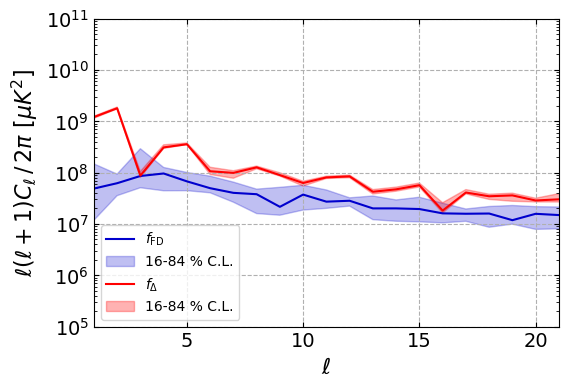

0.1


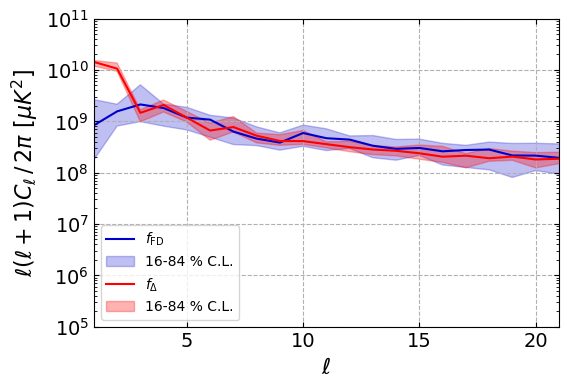

In [3]:
N0_pix = Params.N0 / simdata.Npix
skymap_norm = N0_pix / (Params.cm**-3)
for m_pick in nu_m_picks:
    print(m_pick)
    SimPlot.power_spectra_FDxPF(
        m_pick=m_pick, 
        pix_dens_FD=pix_dens_FD - skymap_norm, 
        pix_dens_PF=pix_dens_PF_halos - skymap_norm,
        y_lims=(1e5, 1e11),
        sim_dir=sim_folder, 
        fig_dir=fig_folder,
        args=Params)

### 1 Halo - 10 PFs

7
0.01


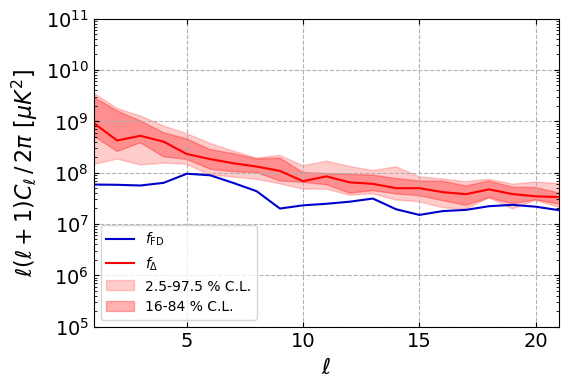

0.1
Max power at l=1: 3.06e+10
Max power of Elbers: 7.96e+10


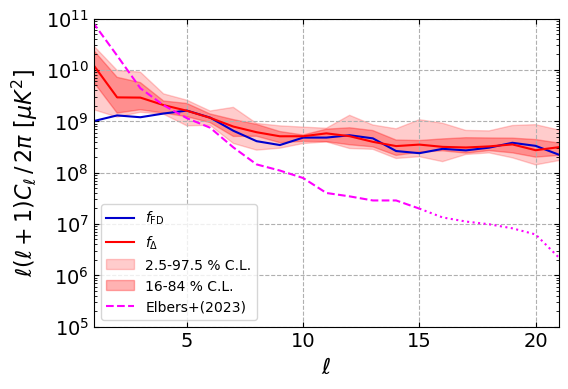

In [5]:
for halo_i in jnp.arange(7,8):

    print(halo_i)

    pix_dens_PF_seeds = jnp.load(f"{sim_folder}/pixel_densities_incl_PFs_seeds_halo{halo_i}.npy")

    N0_pix = Params.N0 / simdata.Npix
    skymap_norm = N0_pix / (Params.cm**-3)
    pix_dens_FD_1Halo = jnp.repeat(pix_dens_FD[halo_i-1][None,...], 10, axis=0)

    for m_pick in nu_m_picks[0:2]:
        print(m_pick)
        SimPlot.power_spectra_FDxPF(
            m_pick=m_pick, 
            pix_dens_FD=pix_dens_FD_1Halo - skymap_norm, 
            pix_dens_PF=pix_dens_PF_seeds - skymap_norm, 
            y_lims=(1e5, 1e11),
            sim_dir=sim_folder, 
            fig_dir=fig_folder,
            args=Params,
            _1Halo=True,
            Elbers=True)